### Sports Person Face Classification

Special thanks and reference to **Dhaval Patel** of Coded Basics whose project resource helped with this

In [2]:
#importing needed libraries
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In image classification there are different attribute that can be used as features for image representation. For example: 
* Object recognition
* Text recognition
* Pattern recognition
* Face detection
* Motion analysis and so on.  

In this case however, face detection method will be used for classification. This methods involves looking for patterns or features that are unique to a particular set of images. Like for example the distance between the eyes, placement of the nose, mouth and other facial landmarks.  
This study uses OpenCV Haarcasades(https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html) which works by using a set of simple Haar-like features, such as edges, lines, and corners, to detect faces in an image.

#### Let's see how OpenCV works

In [25]:
#creating a variable to store the test image
img = cv2.imread('C://Windows//System32//Sport_Person_Classifier//Model//test2.jpg')
img  #returns a NumPy array that represents the image data in the form of a matrix

array([[[ 41,  35,  30],
        [ 45,  39,  34],
        [ 48,  42,  37],
        ...,
        [ 24,  20,  15],
        [ 22,  18,  13],
        [ 18,  14,   9]],

       [[ 38,  32,  27],
        [ 41,  35,  30],
        [ 44,  38,  33],
        ...,
        [ 29,  25,  20],
        [ 28,  24,  19],
        [ 25,  21,  16]],

       [[ 38,  32,  27],
        [ 40,  34,  29],
        [ 42,  36,  31],
        ...,
        [ 31,  27,  22],
        [ 32,  28,  23],
        [ 31,  27,  22]],

       ...,

       [[207, 196, 252],
        [207, 196, 252],
        [208, 197, 253],
        ...,
        [244, 244, 244],
        [245, 245, 245],
        [245, 245, 245]],

       [[207, 196, 252],
        [207, 196, 252],
        [208, 197, 253],
        ...,
        [244, 244, 244],
        [245, 245, 245],
        [245, 245, 245]],

       [[207, 196, 252],
        [207, 196, 252],
        [208, 197, 253],
        ...,
        [244, 244, 244],
        [245, 245, 245],
        [245, 245, 245]]

In [24]:
img.shape   #returns the dimension and number of colour channels

(1200, 1200, 3)

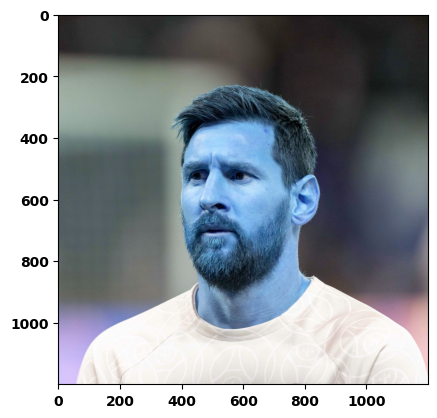

In [14]:
plt.imshow(img)

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #converts img to another color space in this case gray
gray.shape  #returns only dimension since it only contains one colour channel

(1200, 1200)

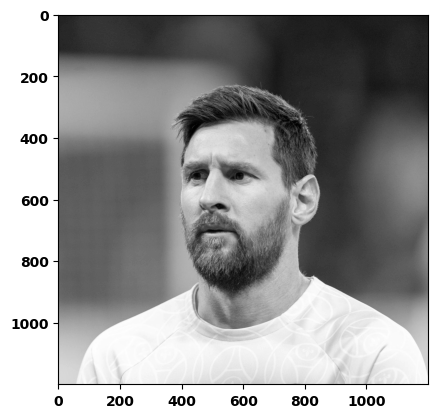

In [27]:
plt.imshow(gray, cmap='gray')

### Data Preprocessing

In [32]:
#creating classifier objects
face_cascade = cv2.CascadeClassifier('C://Windows//System32//Sport_Person_Classifier//Server//OpencvHaarcasades//haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C://Windows//System32//Sport_Person_Classifier//Server//OpencvHaarcasades//haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)   #detectMultiScale() function detects face in a gray. With three arguments: gray, a scale factor, and minimum number of neighbor rectangles.
faces      #coordinates(x,y,w,h) of the rectangle that represents the detected face in gray. return more than one array if multiple faces are detected 

array([[304, 357, 427, 427]])

In [33]:
(x,y,w,h) = faces[0]    #returns array of first detected face in gray
x,y,w,h

(304, 357, 427, 427)

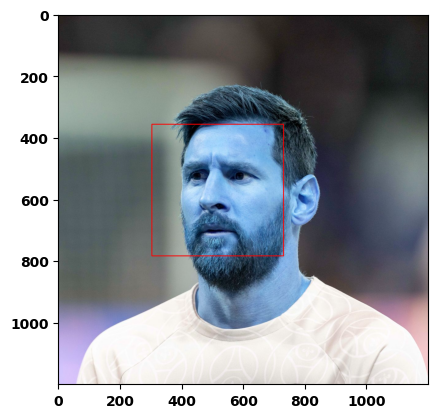

In [34]:
#drawing a rectangle around detected face
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  #arguments: img, the coordinates, rectangle colour, and thickness of the rectangle border 2.
plt.imshow(face_img)

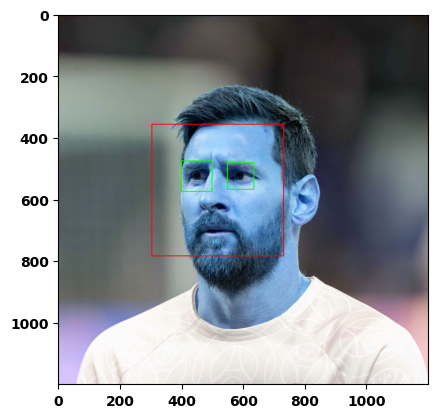

In [39]:
#loop that iterates through face and eye variables, creates roi variables and plot the image with rectangle around detected face and eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)   #notice the different colour code for eyes
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

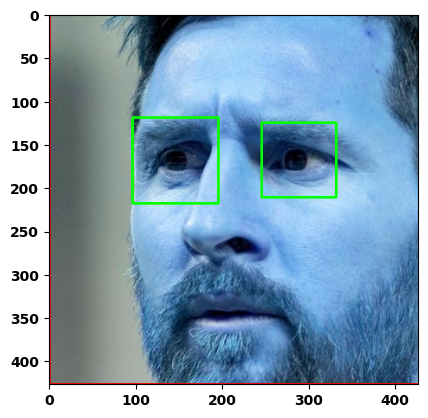

In [44]:
#plotting cropped detected face(roi_color)
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [45]:
#creating numpy array of cropped face
cropped_img = np.array(roi_color)
cropped_img.shape     

(427, 427, 3)

In [65]:
#defining a function that extracts the cropped face from an input image only if two eyes are detected within the detected face region.
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

Calling the function on an image with two eyes

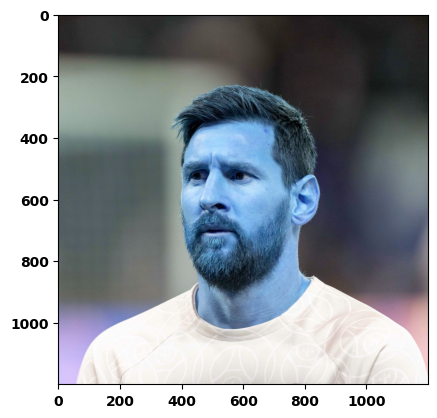

In [51]:
original_image = cv2.imread('C://Windows//System32//Sport_Person_Classifier//Model//test2.jpg')
plt.imshow(original_image)

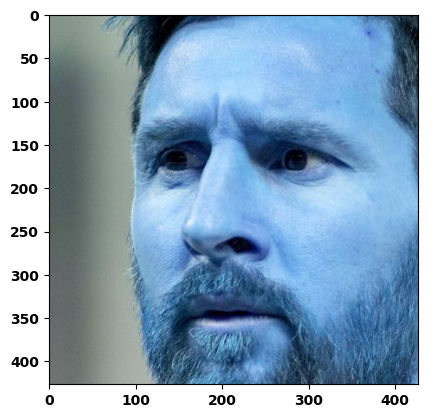

In [67]:
cropped_image = get_cropped_image_if_2_eyes('C://Windows//System32//Sport_Person_Classifier//Model//test2.jpg')
plt.imshow(cropped_image)

Calling the function on an obstructed image (two eyes not showing clearly)

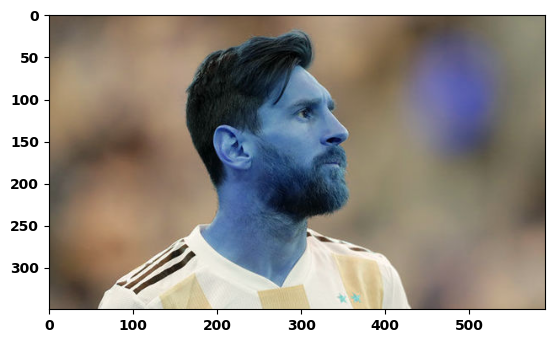

In [55]:
obstructed_image = cv2.imread('C://Windows//System32//Sport_Person_Classifier//Model//test.jpg')
plt.imshow(obstructed_image)

In [68]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C://Windows//System32//Sport_Person_Classifier//Model//test.jpg')
if cropped_image_no_2_eyes is not None:            #using if, else statement because None cannot be displayed using Matplotlib's imshow() function
    plt.imshow(cropped_image_no_2_eyes)
else:
    print("The image does not contain two eyes.")

The image does not contain two eyes.


In [73]:
#defining two paths which would be useful later
path_to_data = "C://Windows//System32//Sport_Person_Classifier//Model//Dataset//"
path_to_cr_data = "C://Windows//System32//Sport_Person_Classifier//Model//Dataset//cropped//"

In [74]:
#creating an empty list-img_dirs and then loops through the entries in the directory specified by the path_to_data variable using the os.scandir() function.
#For each entry in the directory, the code checks if it is a directory using the is_dir() method of the entry object. If the entry is a directory, its path is appended to the img_dirs list using the append() method.

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [75]:
#displays list containing the paths of all directories in the directory specified by the path_to_data
img_dirs

['C://Windows//System32//Sport_Person_Classifier//Model//Dataset//cropped',
 'C://Windows//System32//Sport_Person_Classifier//Model//Dataset//lionel_messi',
 'C://Windows//System32//Sport_Person_Classifier//Model//Dataset//maria_sharapova',
 'C://Windows//System32//Sport_Person_Classifier//Model//Dataset//rafael_nadal',
 'C://Windows//System32//Sport_Person_Classifier//Model//Dataset//ronaldo',
 'C://Windows//System32//Sport_Person_Classifier//Model//Dataset//serena_williams']

In [76]:
#delete the directory specified by the path_to_cr_data variable (if it exists) and then create a new directory with the same name.
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [77]:
#looping through each directory in the img_dirs list and extracting cropped images of faces from each image file in the directory.
#creates a new folder with the celebrity name in the path_to_cr_data directory(if it doesn't already exist) 
#saves the cropped image as a PNG file in the new folder 
#and adds the path of the cropped image to the list associated with the celebrity name in the celebrity_file_names_dict dictionary.
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C://Windows//System32//Sport_Person_Classifier//Model//Dataset//cropped//lionel_messi
Generating cropped images in folder:  C://Windows//System32//Sport_Person_Classifier//Model//Dataset//cropped//maria_sharapova
Generating cropped images in folder:  C://Windows//System32//Sport_Person_Classifier//Model//Dataset//cropped//rafael_nadal
Generating cropped images in folder:  C://Windows//System32//Sport_Person_Classifier//Model//Dataset//cropped//ronaldo
Generating cropped images in folder:  C://Windows//System32//Sport_Person_Classifier//Model//Dataset//cropped//serena_williams


All cropped images are now in cropped foldr according to respective names.

Carefully examine cropped images and remove unmwanted ones that will negatively affect accuracy of the classifier.

### Feature Extraction

**Wavelet Transform**  
Inorder to reduce computational complexity and improve classifier accuracy, signal processing technique called wavelet transform is employed.  
Unlike traditional image representation, Wavelet transform extract more meaningful and discriminative features from an image. By capturing texture and structural features at different scales and orientations.

In [78]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

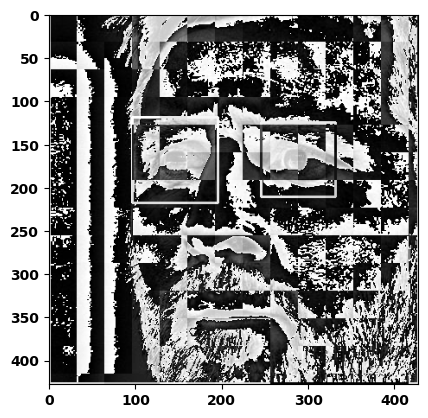

In [84]:
#displaying wavelet coefficients at different scales capturing features such as edges, contours, and texture patterns
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')  

In [99]:
#creating a dictionary called class_dict that maps celebrity names to class labels. 
class_dict = {}
count = 0
skip_first = True

for celebrity_name in celebrity_file_names_dict.keys():
    if skip_first:
        skip_first = False
        continue  # skip the first item
    class_dict[celebrity_name] = count
    count = count + 1

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'rafael_nadal': 2,
 'ronaldo': 3,
 'serena_williams': 4}

In [100]:
#defining feature and target
#where x=images and y=celebrity names
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)   #reading images with opencv
        scalled_raw_img = cv2.resize(img, (32, 32))     #resizing images to be the same size
        img_har = w2d(img,'db1',5)                       #wavelet transform
        scalled_img_har = cv2.resize(img_har, (32, 32))   #resizing
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))  #vertically stacking coloured images and wavelet transformed images
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [127]:
#returns length of the feature vector for the first training image.
#which is the combined feature vector for a single image. 
#The length of each feature vector should be equal to .shape of scaled raw image (32x32x3 = 3072) + (.shape) of the scaled wavelet transformed image (32x32 = 1024)

len(X[0])

4096

In [121]:
#first element of X
X[0]

array([[134],
       [149],
       [141],
       ...,
       [246],
       [243],
       [199]], dtype=uint8)

In [123]:
# first element of y which represents the class label
y[0]

0

In [126]:
#number of samples
len(X)

139

In [131]:
#np.array() converts X to a numpy array
#reshape converts to 2-dimensional array. 
#Arguments: number of samples by using the len() function and length of each feature vector, which is 4096

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(139, 4096)

### Model Training

In [137]:
#importing libraries
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [141]:
#train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [147]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8857142857142857

In [148]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      1.00      0.89         4
           2       1.00      0.60      0.75         5
           3       0.90      0.90      0.90        10
           4       0.71      0.83      0.77         6

    accuracy                           0.89        35
   macro avg       0.88      0.87      0.86        35
weighted avg       0.90      0.89      0.88        35



In [160]:
#creating dictionary that specifies models and their hyperparameters
n_estimators_range = range(10, 101, 10)
svm_range= range(1, 1000, 10)
logisticregression_range = range(5, 50, 5)
KNN_range=  range(1, 50, 5)

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': svm_range,
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': n_estimators_range
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [5,10,20]
        }
    },
    'Tree' : {
        'model': DecisionTreeClassifier(),
        "params" : {
            'decisiontreeclassifier__max_depth': [10, 30, None]
        }
    },
    'KNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'kneighborsclassifier__n_neighbors': KNN_range,
            'kneighborsclassifier__weights': ['uniform', 'distance']
        }
    }
}


In [161]:
#performing gridsearchcv on models_params dictionary and creating a dataframe of best scores and parameters
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.663333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.702857,{'randomforestclassifier__n_estimators': 100}
2,logistic_regression,0.740476,{'logisticregression__C': 5}
3,Tree,0.546667,{'decisiontreeclassifier__max_depth': 30}
4,KNN,0.596190,"{'kneighborsclassifier__n_neighbors': 21, 'kne..."


In [162]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))]),
 'Tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(max_depth=30))]),
 'KNN': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=21))])}

In [163]:
best_estimators['svm'].score(X_test,y_test)

0.8857142857142857

In [164]:
best_estimators['random_forest'].score(X_test,y_test)

0.6571428571428571

In [165]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8571428571428571

In [166]:
best_estimators['Tree'].score(X_test,y_test)

0.42857142857142855

In [167]:
best_estimators['KNN'].score(X_test,y_test)

0.7142857142857143

In [168]:
best_clf = best_estimators['svm']

In [170]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))

Text(95.72222222222221, 0.5, 'Truth')

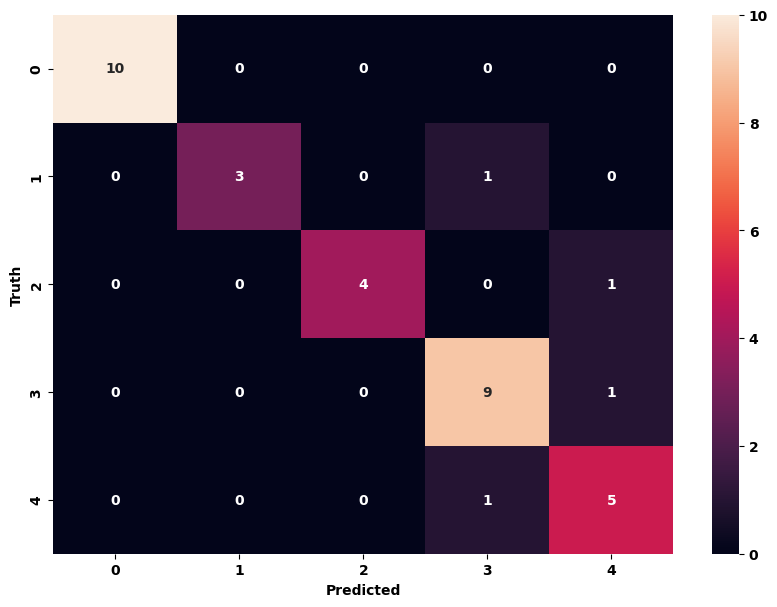

In [171]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [172]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'rafael_nadal': 2,
 'ronaldo': 3,
 'serena_williams': 4}

Saving the trained model

In [173]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

Saving class dictionary

In [174]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))